In [2]:
%cd ..

/Users/shreyaraghavendra/Library/CloudStorage/OneDrive-UvA/Complex Systems Simulation/css_group_6


In [9]:
import numpy as np
import csv

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.signal import find_peaks
from scipy.signal import savgol_filter

In [10]:
generations = 500
tau_values = 100

In [11]:
def read_history(history_array, history_csv_file='history_data.csv'):
    """
        #it is used in this way:
        history_csv_file = '../data/history_data.csv'
        history_array = []
        history_array = read_history(history_array, history_csv_file)
        for tau in range(0, 100):
        for g in range(0, GENERATIONS):
            print(history_array[tau][g])
    """
    # Read the CSV file and store the data in groups of 500 lines
    with open(history_csv_file, mode='r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        group = []
        for i, row in enumerate(reader):
            group.append(row)
            # Add to the history array and reset the group after accumulating 500 lines, or at the end of the file
            if (i + 1) % 500 == 0 or i == reader.line_num - 1:
                history_array.append(group)
                group = []
    print(f"Importing completed, there are {len(history_array)} history entries in total")
    return history_array

history_csv_file = 'data/history_data.csv'
history_array = []

history_array = read_history(history_array, history_csv_file)

len(history_array)
# Contains 100 lists, each with 500 dicts, corresponding to tau and generations respectively

Importing completed, there are 100 history entries in total


100

In [12]:
# Store important values
Nc_values_3d = np.zeros((generations, tau_values))
Nc_values_3d_smoothed = np.zeros((generations, tau_values))
Nc_derivative_3d = np.zeros((generations, tau_values))
Nc_derivative_3d_smoothed = np.zeros((generations, tau_values))

# Populate the Nc values and their derivatives for the 3D plot
for i, tau in enumerate(range(tau_values)):
    for j, generation in enumerate(range(generations)):
        Nc_values_3d[j, i] = history_array[tau][generation]['Nc']
    # Compute the derivative of Nc with respect to generations
    Nc_derivative_3d[:, i] = np.gradient(Nc_values_3d[:, i].astype(int))

In [13]:
# Parameters for Savitzky-Golay filter
window_length = 51  # Size of the filtering window
polyorder = 5     # The order of the polynomial used to fit the samples

# Apply the Savitzky-Golay filter to each curve
for i in range(Nc_values_3d.shape[1]):
    Nc_values_3d_smoothed[:, i] = savgol_filter(Nc_values_3d[:, i], window_length, polyorder)
    Nc_derivative_3d_smoothed[:, i] = savgol_filter(Nc_derivative_3d[:, i], window_length, polyorder)

### Method 1: Plot critical points of f(x) = Nc vs Generations against Bifurcation Parameter 'Tau'

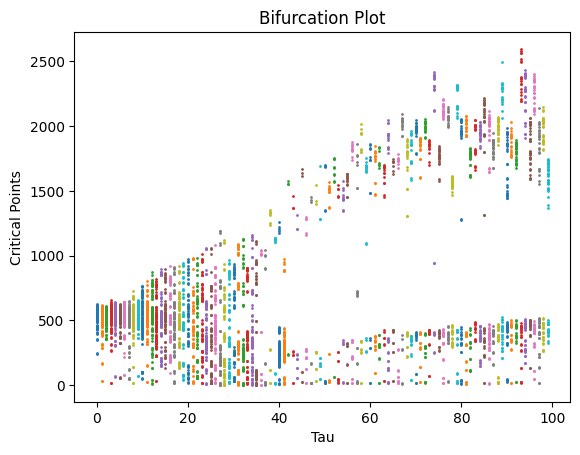

In [12]:
critical_points_by_tau = []
taus = []
final_value = []

for tau in range(0, 100):
    Nc_data = np.array([history_array[tau][i]['Nc'] for i in range(generations)]).astype(int)
    
    peaks, _ = find_peaks(Nc_data, prominence=1)
    peaks_values = Nc_data[peaks]
    troughs, _ = find_peaks(-Nc_data, prominence=1)
    troughs_values = Nc_data[troughs]
    final_value.append(Nc_data[-1])
    combined_values = np.concatenate((peaks_values, troughs_values))
    critical_points_by_tau.append(combined_values)
    taus.append(tau)

for tau in range(0, 100):
    y_values = critical_points_by_tau[tau]
    if y_values.size == 0:
        y_values = [final_value[tau]]
    x_values = [tau] * len(y_values)
    
    plt.scatter(x_values, y_values, s = 1)
    
plt.title('Bifurcation Plot')
plt.xlabel('Tau')
plt.ylabel('Critical Points')
plt.show()

### Method 2: Plot phase-space (using derivative) against tau

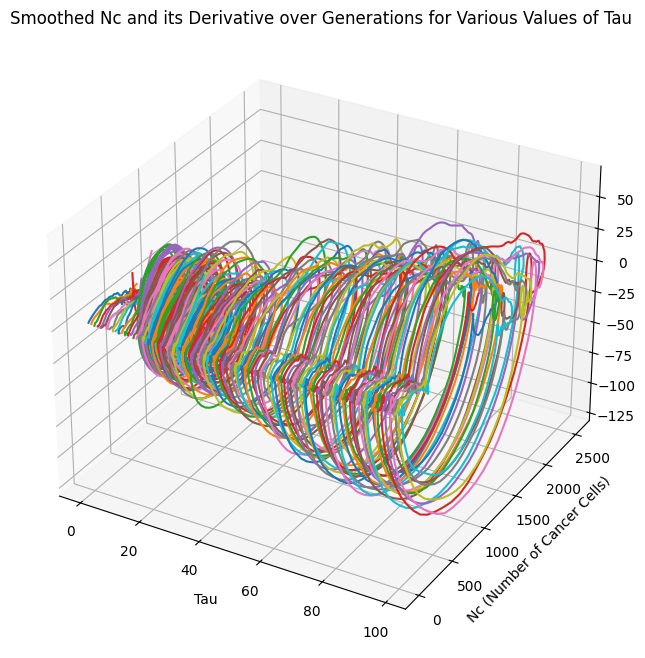

In [14]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the smoothed data
for i, tau in enumerate(range(tau_values)):
    ax.plot([tau] * generations, Nc_values_3d_smoothed[:, i], Nc_derivative_3d_smoothed[:, i], label=f'Tau = {tau}')

# # Plot a selected range
# selected_range = list(range(0,10))
# for i, tau in enumerate(selected_range):
#     ax.plot([tau] * generations, Nc_values_3d_smoothed[:, tau], Nc_derivative_3d_smoothed[:, tau], label=f'Tau = {tau}')

# Set labels for the axes
ax.set_xlabel('Tau')

# Set labels for the axes
ax.set_xlabel('Tau')
ax.set_ylabel('Nc (Number of Cancer Cells)')
ax.set_label('dNc/dGenerations')
ax.set_title('Smoothed Nc and its Derivative over Generations for Various Values of Tau')

# Show the 3D plot
plt.show()

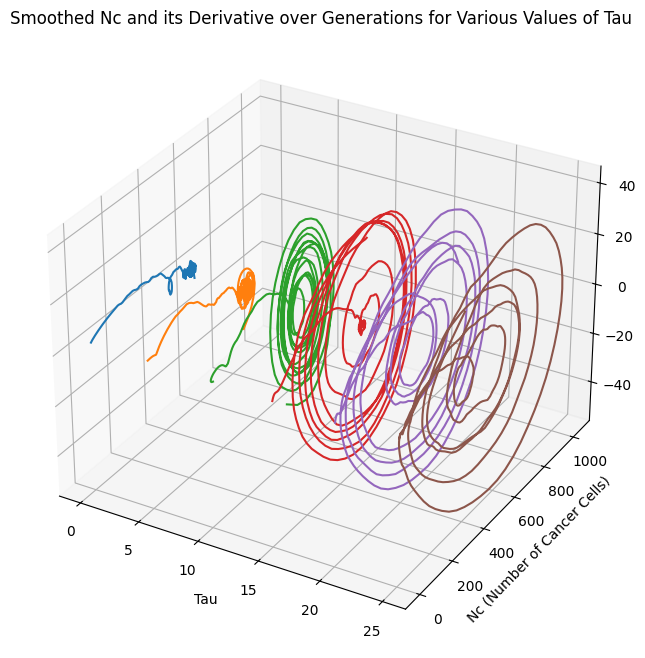

In [23]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# # Plot the smoothed data
# for i, tau in enumerate(range(tau_values)):
#     ax.plot([tau] * generations, Nc_values_3d_smoothed[:, i], Nc_derivative_3d_smoothed[:, i], label=f'Tau = {tau}')

# Plot a selected range
selected_range = list(range(0,30,5))
for i, tau in enumerate(selected_range):
    ax.plot([tau] * generations, Nc_values_3d_smoothed[:, tau], Nc_derivative_3d_smoothed[:, tau], label=f'Tau = {tau}')

# Set labels for the axes
ax.set_xlabel('Tau')

# Set labels for the axes
ax.set_xlabel('Tau')
ax.set_ylabel('Nc (Number of Cancer Cells)')
ax.set_label('dNc/dGenerations')
ax.set_title('Smoothed Nc and its Derivative over Generations for Various Values of Tau')

# Show the 3D plot
plt.show()

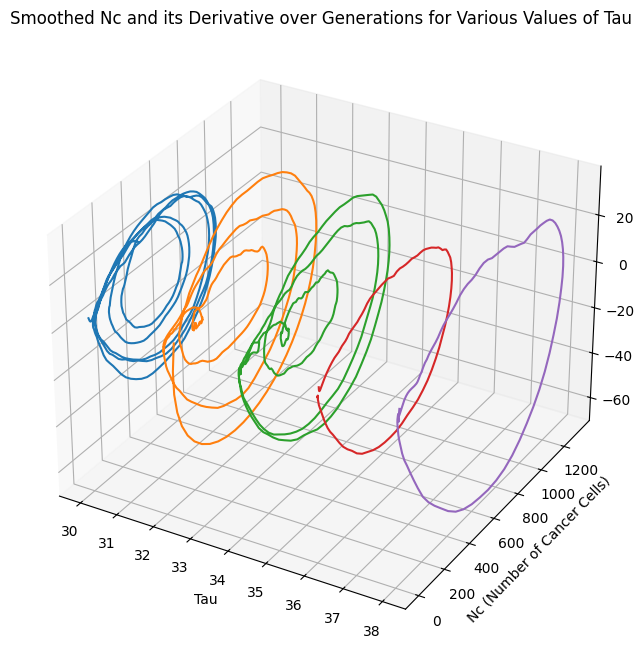

In [24]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# # Plot the smoothed data
# for i, tau in enumerate(range(tau_values)):
#     ax.plot([tau] * generations, Nc_values_3d_smoothed[:, i], Nc_derivative_3d_smoothed[:, i], label=f'Tau = {tau}')

# Plot a selected range
selected_range = list(range(30,40,2))
for i, tau in enumerate(selected_range):
    ax.plot([tau] * generations, Nc_values_3d_smoothed[:, tau], Nc_derivative_3d_smoothed[:, tau], label=f'Tau = {tau}')

# Set labels for the axes
ax.set_xlabel('Tau')

# Set labels for the axes
ax.set_xlabel('Tau')
ax.set_ylabel('Nc (Number of Cancer Cells)')
ax.set_label('dNc/dGenerations')
ax.set_title('Smoothed Nc and its Derivative over Generations for Various Values of Tau')

# Show the 3D plot
plt.show()

### Interactive plot for further analysis

In [39]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 13.5 MB/s eta 0:00:0000:0100:01


In [7]:
import plotly.io as pio
pio.renderers.default = 'notebook'

import plotly.graph_objs as go

# Assuming Nc_values_3d, Nc_derivative_3d, and tau_values are defined as before

# Create traces for each tau value
traces = []
for i, tau in enumerate(range(tau_values)):
    trace = go.Scatter3d(
        x=[tau] * generations,  # Tau values along the x-axis
        y=Nc_values_3d[:, i],        # Nc values along the y-axis
        z=Nc_derivative_3d[:, i],    # Derivative values along the z-axis
        mode='lines',
        name=f'Tau = {tau}'
    )
    traces.append(trace)

# Define layout
layout = go.Layout(
    title='3D Plot of Nc and its Derivative over Generations',
    scene=dict(
        xaxis_title='Tau',
        yaxis_title='Nc (Number of Cancer Cells)',
        zaxis_title='dNc/dGenerations'
    ),
    margin=dict(l=0, r=0, b=0, t=0)  # Tight layout
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show figure
fig.show()


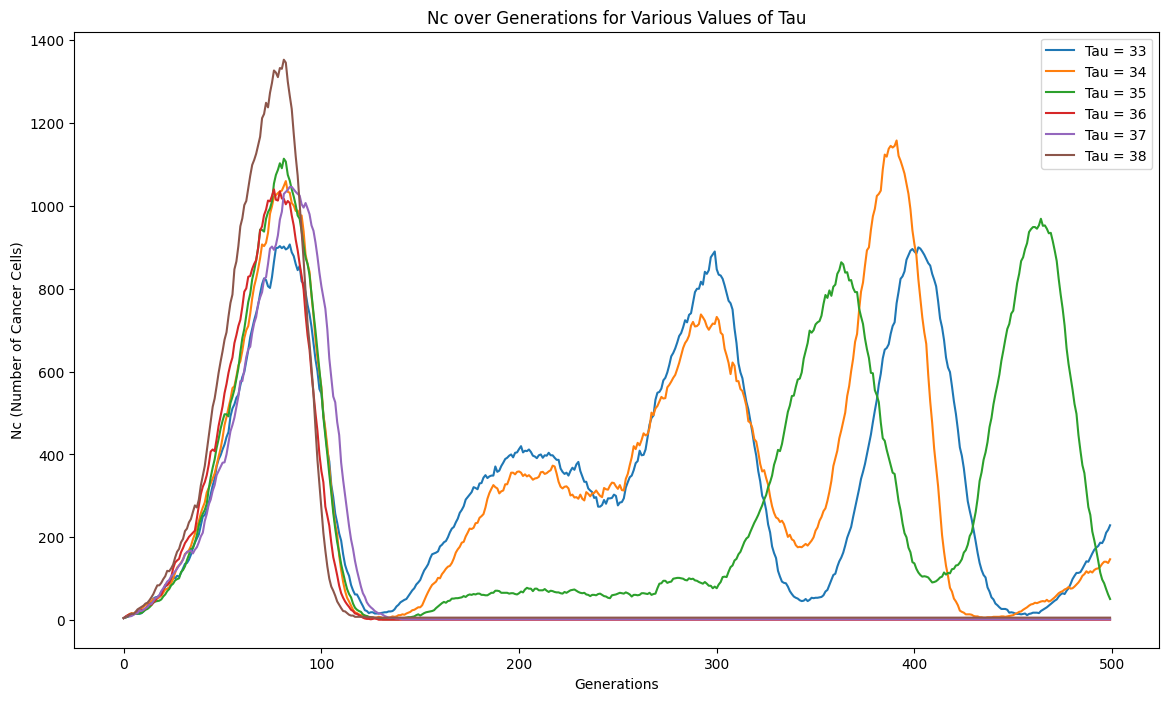

In [30]:
plt.figure(figsize=(14, 8))

# Plot Nc for the selected tau values
for tau in range(33,39):
    Nc_values = np.array([history_array[tau][g]['Nc'] for g in range(generations)]).astype(int)
    plt.plot(range(generations), Nc_values, label=f'Tau = {tau}')

plt.xlabel('Generations')
plt.ylabel('Nc (Number of Cancer Cells)')
plt.title('Nc over Generations for Various Values of Tau')
plt.legend()
plt.show()


### Method 3: Use time delay embedding instead of derivative

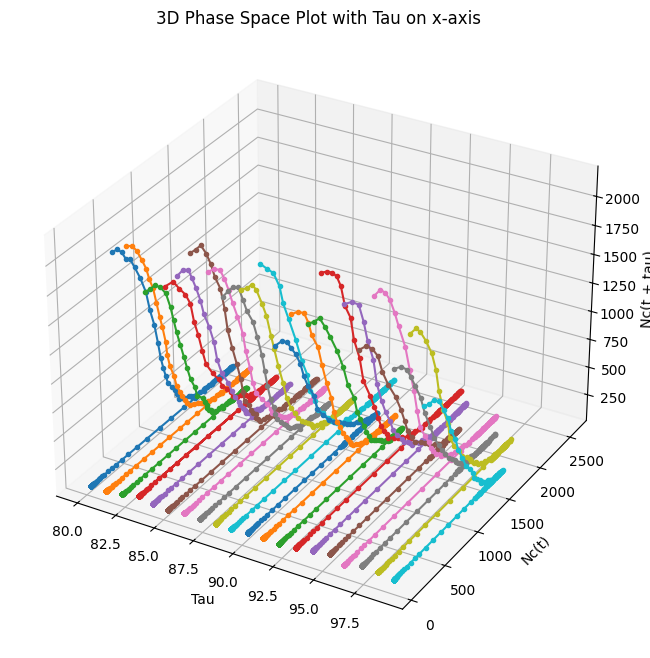

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'history_array', 'generations', and 'tau_values' are already defined

# Store important values
Nc_values_3d = np.zeros((generations, tau_values))

# Populate the Nc values for the 3D plot
for i, tau in enumerate(range(tau_values)):
    for j, generation in enumerate(range(generations)):
        Nc_values_3d[j, i] = history_array[tau][generation]['Nc']

# Choose embedding dimension (2 for a 2D phase space plot)
embedding_dim = 2
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create phase space plots for each tau
for tau in range(80, tau_values):
    # Ensure there's enough data for the given tau
    if tau < generations - 1:
        # Reconstruct the phase space for this tau
        time_series = Nc_values_3d[:, tau]

        # Adjust the slicing to ensure equal length arrays
        if len(time_series) > 2 * tau:
            phase_space = np.array([time_series[tau:-tau], time_series[2*tau:]])
            phase_space = phase_space.T

            # Creating an array for tau to match the dimensions of the phase space points
            tau_array = np.full(len(phase_space), tau)

            ax.plot(tau_array, phase_space[:, 0], phase_space[:, 1], '.-')

ax.set_title('3D Phase Space Plot with Tau on x-axis')
ax.set_xlabel('Tau')
ax.set_ylabel('Nc(t)')
ax.set_zlabel('Nc(t + tau)')
plt.show()
